<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name="glass")

In [ ]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
print("Length of the Dataset :" + str(len(df)))

Length of the Dataset :214


Check for missing values, outliers, inconsistencies in the data.

In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


# Boxplot

Original shape: (214, 10)


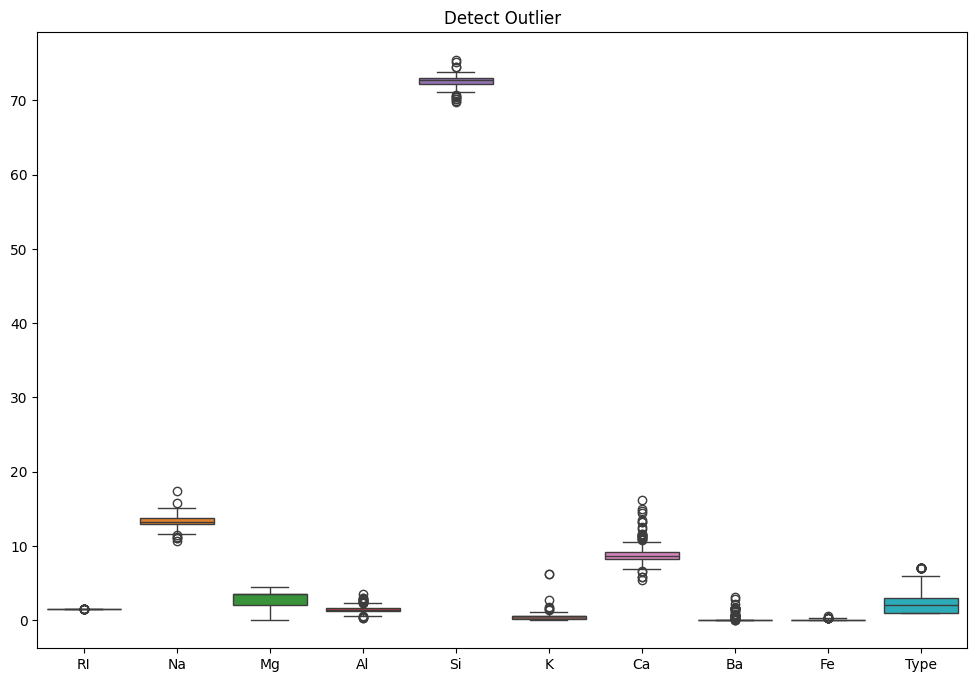

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title("Detect Outlier")
print("Original shape:", df.shape)
plt.show()

In [ ]:
# Remove Outlier
from scipy import stats
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3)   # threshold = 3 std deviations
print("Number of outliers:", np.sum(outliers))

Number of outliers: 33


In [ ]:
df_clean = df[~outliers.any(axis=1)]
print("Original shape:", df.shape)



Original shape: (214, 10)


After removing outliers: (194, 10)


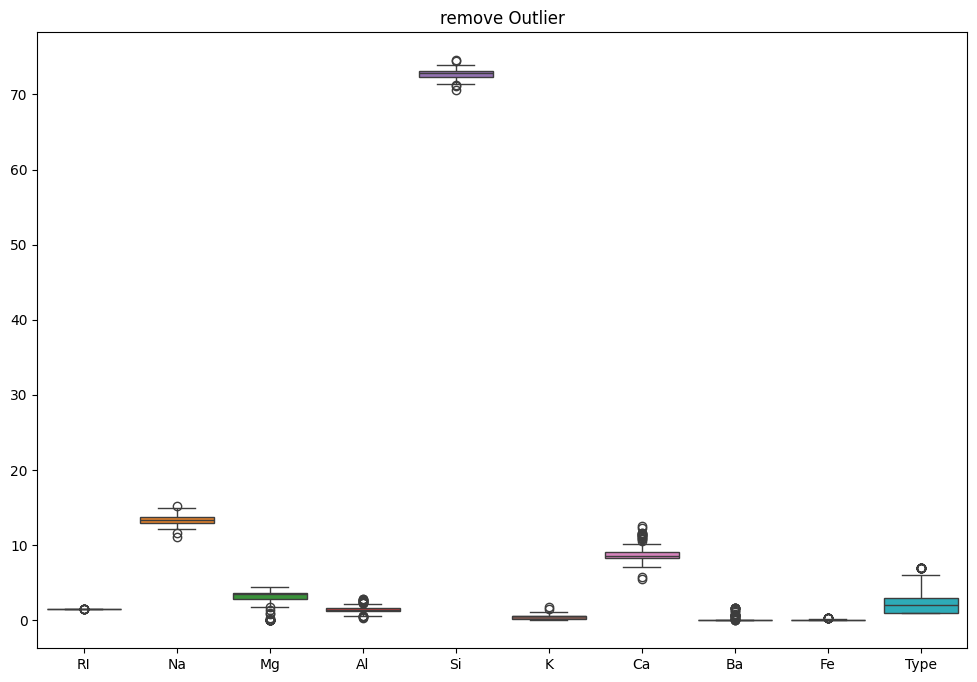

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df_clean)
plt.title("remove Outlier")
print("After removing outliers:", df_clean.shape)
plt.show()

Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.


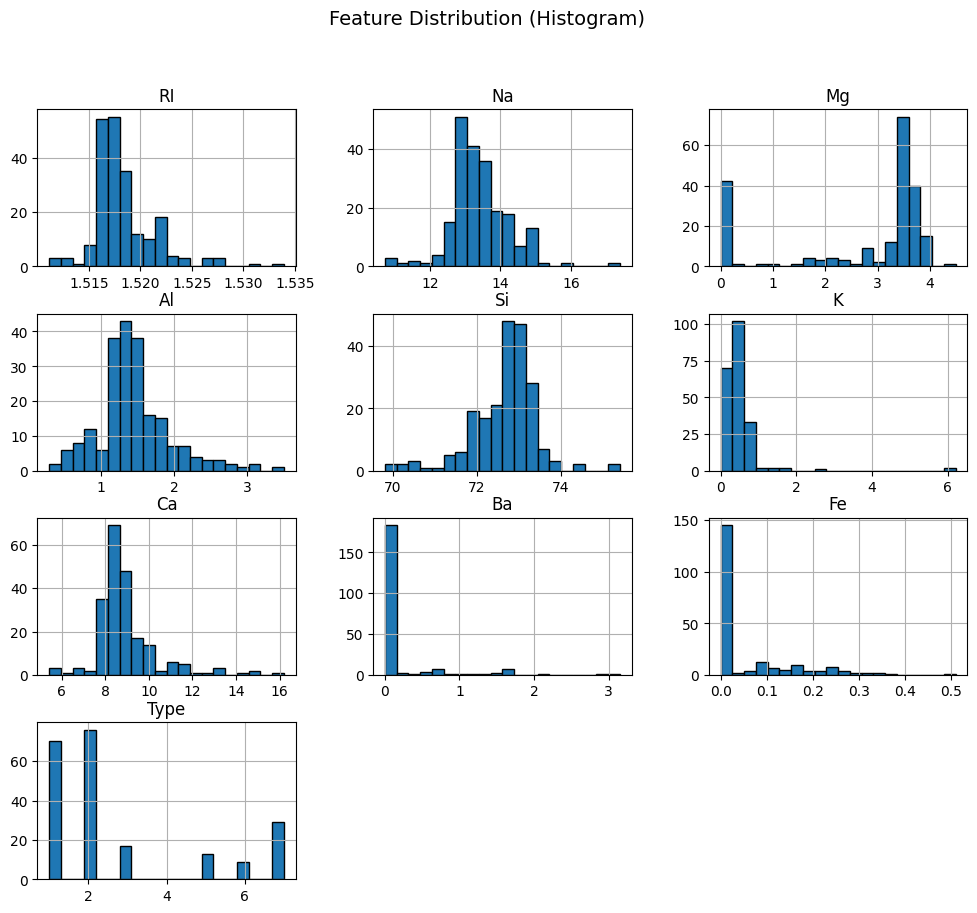

In [ ]:
# Histogram
#Show the distribution of each feature (normal, skewed, bimodal).
df.hist(figsize=(12,10), bins = 20, edgecolor = "black")
plt.suptitle("Feature Distribution (Histogram)",fontsize=14)
plt.show()

Correlation Heatmap

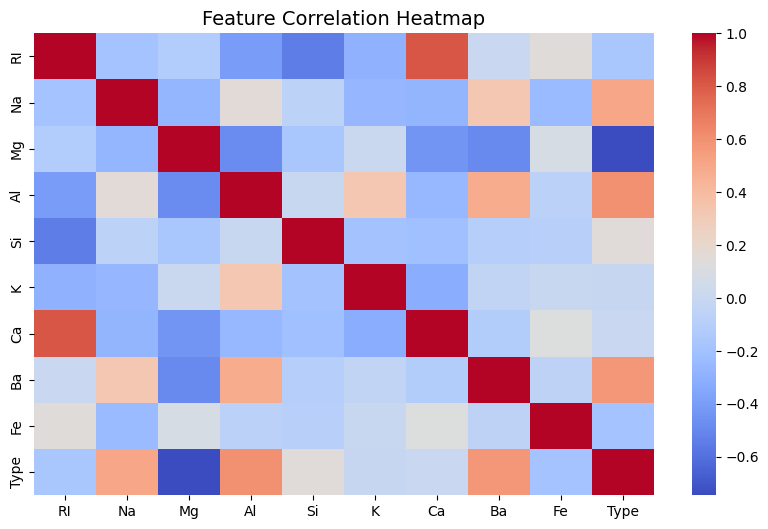

In [ ]:
#Shows relationships between features.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap = "coolwarm", annot = False, cbar = True)
plt.title("Feature Correlation Heatmap", fontsize = 14)
plt.show()

Pairplot: Relationships Between Features

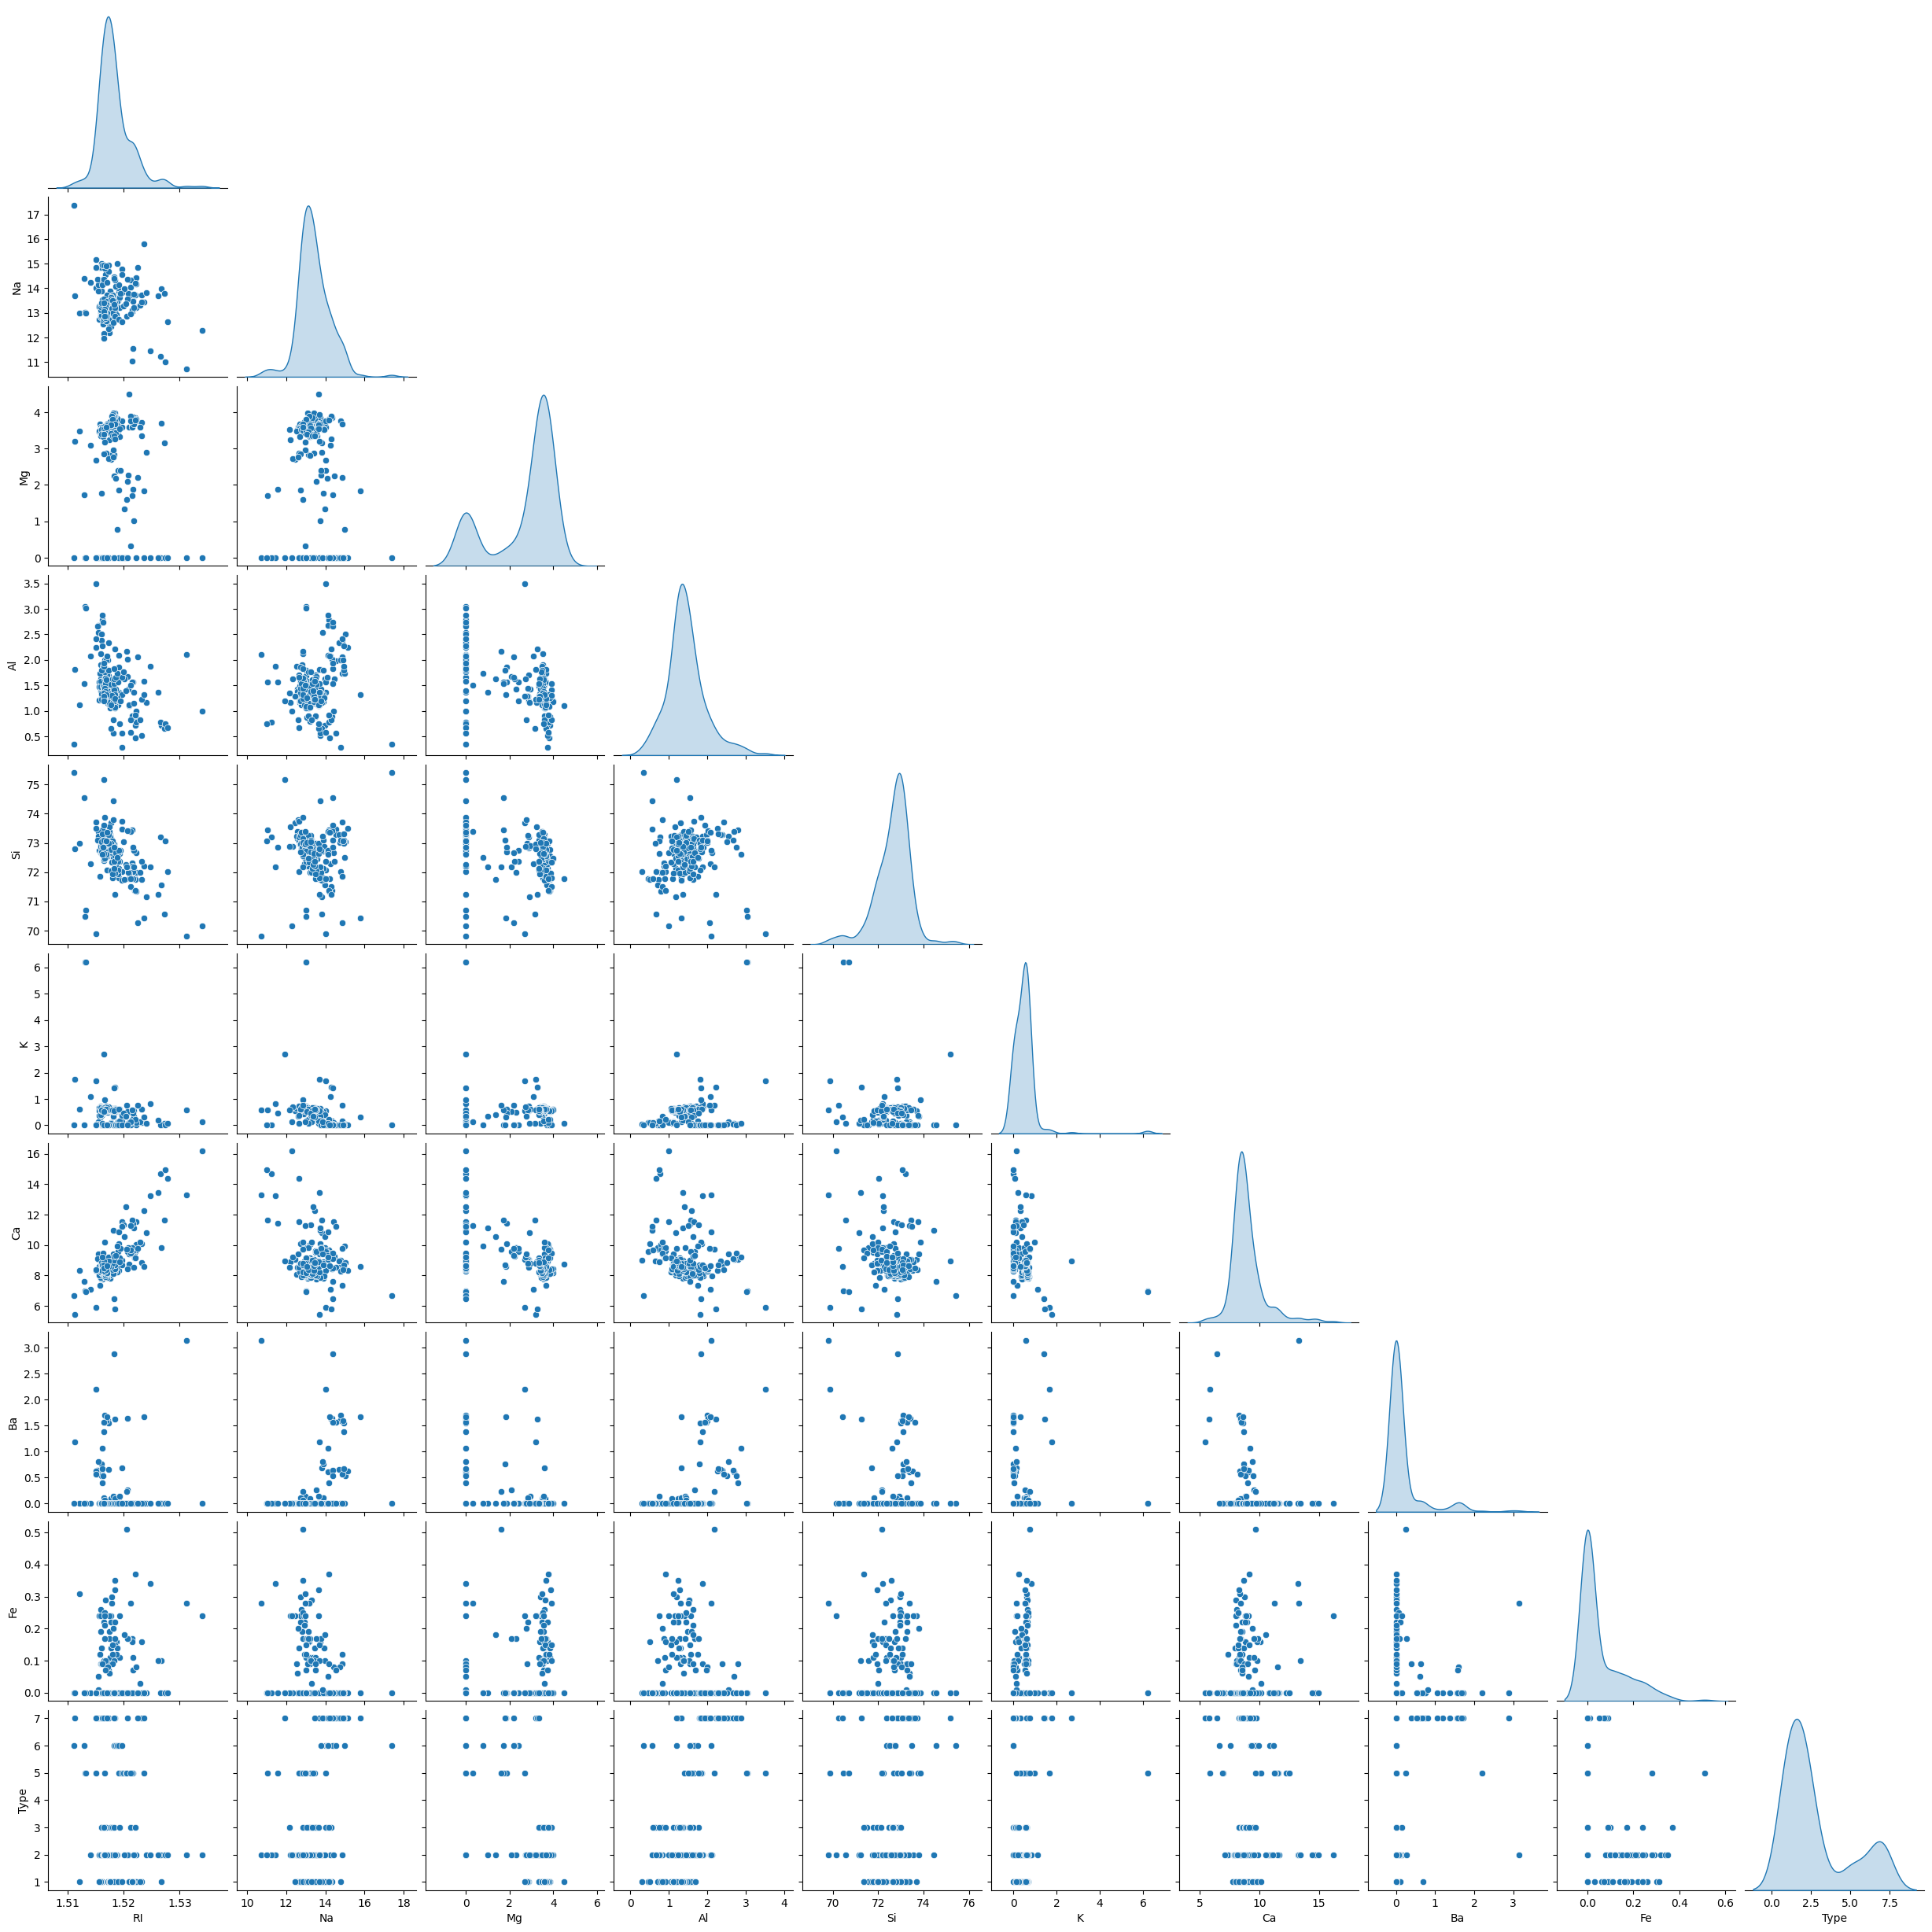

In [ ]:
sns.pairplot(df, diag_kind="kde", corner=True)
plt.show()

Data Preprocessing

In [ ]:
#1.Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
print(df.isnull().sum())
print("No Missing Value in the dataset")

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64
No Missing Value in the dataset


In [ ]:
#2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
print(df.dtypes)
print("No Categorical Column Found")

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object
No Categorical Column Found


In [ ]:
#3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale = scaler.fit_transform(df)



# Random Forest Model Implementation

In [ ]:
#1. Divide the data into train and test split.
x = df.drop('Type', axis = 1)
y = df['Type']

In [ ]:
x.shape

(214, 9)

In [ ]:
y.shape

(214,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100, max_depth=None, random_state=42
)

#Train
rf.fit(x_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(x_test_scaled)

#Train the model on the train dataset.

In [ ]:

# Evaluate the performance on test data using metrics like
# accuracy, precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, classification_report
acc = accuracy_score(y_test, y_pred)


pre = precision_score(y_test,y_pred, average="weighted")

recall = recall_score(y_test, y_pred, average="weighted")

f1 = f1_score(y_test, y_pred, average="weighted")


print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {pre:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

# Detailed per-class metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy  : 0.8372
Precision : 0.8668
Recall    : 0.8372
F1-Score  : 0.8330

Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



 Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Bagging with Decision Tree
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(x_train, y_train)
y_pred_bag = bagging.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

# Boosting with AdaBoost
boosting = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting.fit(x_train, y_train)
y_pred_boost = boosting.predict(x_test)
print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))

Bagging Accuracy: 0.8604651162790697
Boosting Accuracy: 0.627906976744186


Additional Notes:


1. Explain Bagging and Boosting methods. How is it different from each other.

    Comparison:

    Bagging reduces variance, helps with overfitting.

    Boosting reduces bias, focuses on hard-to-predict samples.

    Both can improve model performance over a single decision tree.

2. Explain how to handle imbalance in the data.

    Methods to handle imbalance:

    Class weights: class_weight='balanced' in Random Forest.

    Oversampling: SMOTE (Synthetic Minority Oversampling Technique).

    Undersampling: Randomly remove samples from majority classes.

    Ensemble methods: Bagging/Boosting can reduce the impact of imbalance if combined with weighted sampling.